#Дискретизация сигнала

Теорема Котельникова

## О сигналах

*Детерминированные* сигналы описываются аналитической функцией (задаются аналитически), и их поведение полностью известно в любой момент времени.

Все сигналы можно разделить на четыре группы:
* аналоговые,
* дискретные,
* квантованные,
* цифровые.

**Аналоговый** сигнал – описывается непрерывной функцией времени. Аналоговый сигнал обеспечивает передачу данных путем непрерывного изменения во времени амплитуды, частоты или фазы. Практически все физические процессы описываются непрерывными функциями времени, поэтому представляют собой аналоговые сигналы. Для аналогового сигнала область значений и определения описывается *непрерывным множеством*.

Для **дискретного** сигнала свойственно прерывистое (дискретное) изменение сигнала во времени. То есть изменения в сигнале происходят скачкообразно через некоторые промежутки времени, называемые интервалом дискретизации – Δt или Td. Дискретизация *аналогового сигнала* состоит в том, что сигнал представляется в виде последовательности значений, взятых в дискретные моменты времени, которые называются *отсчётами* (сэмплами).

**Квантованные** сигналы принимают ряд конечных значений из диапазона непрерывных или дискретных величин. Как правило, сигналы квантуются по уровню, то есть по амплитуде.

**Цифровые** сигналы получаются из аналоговых с помощью операций **дискретизации** и **квантования** по уровню. Значениям цифрового сигнала присваивается кодовое слово или набор символов (зачастую двоичных).

Устройства, осуществляющие дискретизацию по времени и квантование по уровню, называются **аналого-цифровыми преобразователями (АЦП)**.
Устройства, переводящие цифровой сигнал в аналоговый называются **цифро-аналоговыми преобразователями (ЦАП)**.

##Отрисовка сигнала

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

%matplotlib inline

Напомним, что магическая функция `%matplotlib inline` позволяет отображать графики без вызова метода `plt.show()`

На приведенном ниже примере представлены сигналы в аналоговой, дискретной и квантованной форме.

**Шаг 1**: создать ряд временных значений:
Функция `np.linspace(start, stop, num)` задает вектор в диапазоне [start, stop], а *num* - количество точек в диапазоне.

**Шаг 2**: создать сигнал произвольной формы:
С помощью функции `np.sin()` задаём сигнал из набора гармонических воздействий. Для простоты амплитуды всех компонент равны 1, а смещение по фазе нулевое.

**Шаг 3** Отрисовка графиков.
Методы matplotlib задают различный стиль отображения:
* `plot()` - стандартный график, выводит сигнал в аналоговой форме,
* `stem()` - график в виде отсчетов, выводит сигнал в дискретной форме,
* `step()` - график в виде уровней, выводит сигнал в квантованной форме.

Для уменьшения количества кода создана вспомогательная функция `plt_sel(s, *args, **kwargs)`, которая выбирает стиль отображения графика. Аргументы `*args` передают значения по осям ординат и абсцисс, `**kwargs` используется для передачи параметров в метод `stem()`.

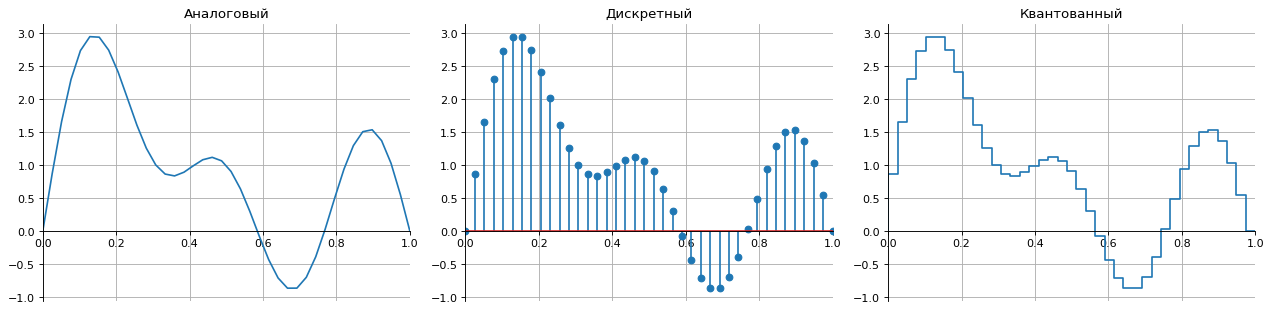

In [3]:
n = 40
# задаем вектор времени
t = np.linspace(0, 1, n, endpoint=True)
# сигнал
x = np.sin(np.pi*t) + np.sin(2*np.pi*t) + np.sin(3*np.pi*t) + np.sin(5*np.pi*t)

# Фунция рисования в нужном виде
def plt_sel(s, *args, **kwargs):
    if s == 0:
        return plt.plot(*args)
    if s == 1:
        return plt.stem(*args, **kwargs)
    if s == 2:
        return plt.step(*args)

t_titles = ['Аналоговый', 'Дискретный', 'Квантованный']

# Рисивание
fig = plt.figure(figsize=(16, 4), dpi=80)
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(t_titles[i])
    plt_sel(i, t, x)
    plt.xlim([0, 1])
    plt.yticks(np.linspace(np.floor(np.min(x)), np.ceil(np.max(x)), 9))
    plt.grid(True)

    # change plot view
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data',0))
plt.tight_layout()

###Шаг квантования и дискретизации

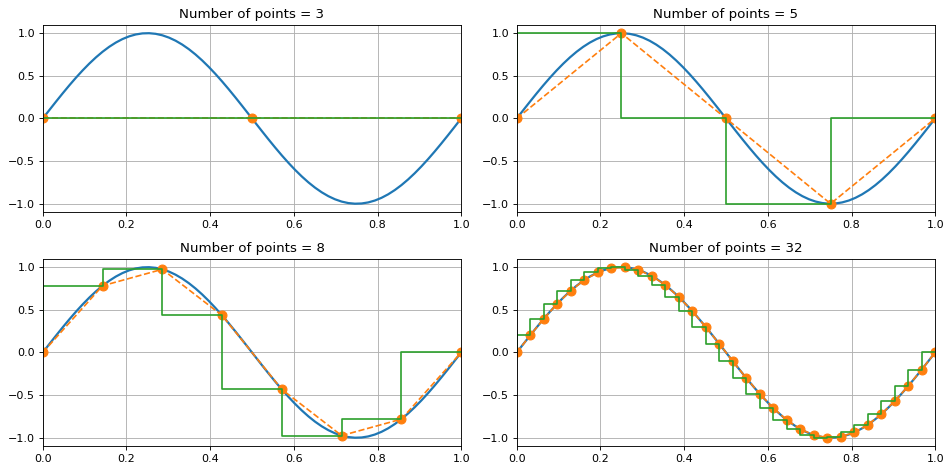

In [4]:
n = 64
t = np.linspace(0, 1, n, endpoint=True)
ds = np.sin(2*np.pi*t)

# Частота дискретизации (число отсчетов на единицу времени)
step_lst = np.array([3, 5, 8, 32])

# Рисование
fig = plt.figure(figsize=(12, 6), dpi=80)
for i in range(4):
    tt = np.linspace(0, 1, step_lst[i], endpoint=True)

    plt.subplot(2, 2, i+1)
    plt.title('Number of points = {}'.format(step_lst[i]))
    plt.plot(t, ds, '-', linewidth=2.0)
    plt.plot(tt, np.sin(2*np.pi*tt), '--o', linewidth=1.5, markersize=8)
    plt.step(tt, np.sin(2*np.pi*tt), linewidth=1.5)
    plt.grid()
    plt.xlim([0, 1])
plt.tight_layout()

####Задание:
Создайте три синусоидальных сигнала с частотой:
* Четверть частоты дискретизации
* Половина частота дискретизации
* Три четверти частоты дискретизации

Отрисуйте сигналы

In [84]:
# Частота дискретизации
Fd = 8000
T = 2
t = np.linspace(0, T, Fd*T + 1)

In [157]:
x1 = np.sin(Fd // 4 * 2.0 * np.pi * t)
x2 = np.sin(Fd // 2 * 2.0 * np.pi * t)
print(x2)
x21 = np.sin(2.0 * np.pi * Fd // 2 * t)
print(x3)
x3 = np.sin(Fd * 3 // 4 * 2.0 * np.pi * t)

[ 0.00000000e+00  1.22464680e-16 -2.44929360e-16 ... -2.16524734e-12
  1.59780317e-14 -5.14266633e-12]
[ 0.00000000e+00 -1.00000000e+00  3.67394040e-16 ...  3.24787101e-12
  1.00000000e+00 -4.07602070e-12]


(0.0, 0.01)

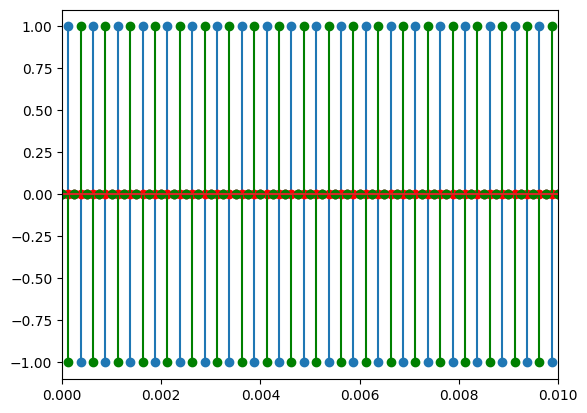

In [153]:
# Рисуем сигнал точками
plt.stem(t, x1)
plt.stem(t, x2, linefmt='red')
plt.stem(t, x3, linefmt='green')
plt.xlim([0, 0.01])

## Послучаем сигналы

In [154]:
from IPython.display import Audio

In [155]:
signal = x1
Audio(signal, rate=Fd)

In [156]:
signal = x2
Audio(signal, rate=Fd)

In [145]:
signal = x3
Audio(signal, rate=Fd)

###Посмотрим спектры сигналов

In [146]:
def cacl_spectr(x, N):
    x = x - x.mean()
    X = fft(x, N)
    X = 2/N * np.abs(X[0:N//2])
    X[0] = X[0]/2
    return X

In [147]:
N = 1024
f = np.linspace(0, Fd//2, N//2)

X1 = cacl_spectr(x1, N)
X2 = cacl_spectr(x2, N)
X3 = cacl_spectr(x3, N)

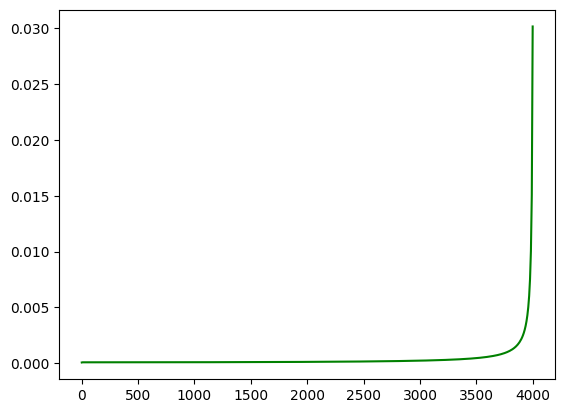

In [148]:
# Рисуем результаты
# plt.stem(f, 2/Fd*T*abs(X1))
# plt.stem(f, 2/Fd*T*abs(X2))
# plt.stem(f, 2/Fd*T*abs(X3))
# plt.plot(f, X1)
plt.plot(f, X2, 'g')
# plt.plot(f, X3, 'r')


###Теорема Котельникова (Найквиста-Шеннона)
**Теорема:** Пусть спектр сигнала x(t) финитный - не содержит частот выше **F**,
т.е. X(f) = 0 за пределами отрезка [-F, F],
дискретизация сигнала x(t) производится с частотой **Fs > 2F**.

*Тогда* исходный аналоговый сигнал x(t) можно точно восстановить из его цифровых отсчетов x(nT).

**Своими словами:**

Максимальная частота, которая присутствует в сигнале равна половине
частоты дискретизации. $f_{max} = fd/2$
